In [ ]:
!pip install ultralytics

In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/archive.zip'
extract_path = '/content/dataset'

# Unzip dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
!pip install roboflow

In [ ]:
# Define classes
classes = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

# Check the dataset structure
train_images_path = '/content/dataset'
train_labels_path = '/content/dataset'

val_images_path = '/content/dataset'
val_labels_path = '/content/dataset'

# Verify that images and labels are aligned
print("Train images:", os.listdir(train_images_path)[:5])
print("Train labels:", os.listdir(train_labels_path)[:5])

Train images: ['aquarium_pretrain']
Train labels: ['aquarium_pretrain']


In [ ]:
data_config = """
train: /content/dataset
val: /content/dataset

nc: 7  # Number of classes
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
"""

with open('/content/underwater.yaml', 'w') as file:
    file.write(data_config)


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')  # yolov8n.pt is the nano model;


In [ ]:
# data traning
model.train(data='/content/underwater.yaml', epochs=50, imgsz=640, batch=16, patience=5)


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/underwater.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 41.4MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 148MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/aquarium_pretrain/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<00:00, 1740.19it/s]

train: New cache created: /content/dataset/aquarium_pretrain/test/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/aquarium_pretrain/test/labels.cache... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.86G      1.555      3.544      1.281        203        640: 100%|██████████| 40/40 [00:18<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]

                   all        638       4817     0.0175      0.689      0.152     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.7G      1.613      2.345      1.268        186        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.36it/s]


                   all        638       4817      0.426        0.2       0.26       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.45G      1.589       2.07       1.28        166        640: 100%|██████████| 40/40 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]

                   all        638       4817      0.471      0.425      0.421      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.78G      1.594      1.905      1.255        169        640: 100%|██████████| 40/40 [00:14<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.09it/s]

                   all        638       4817       0.52      0.451      0.437      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.57G       1.54      1.803      1.266        169        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]


                   all        638       4817      0.586      0.585       0.58      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.73G      1.535      1.651      1.242        191        640: 100%|██████████| 40/40 [00:13<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.07it/s]

                   all        638       4817      0.609      0.565      0.595      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.77G      1.494      1.594      1.222        153        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.23it/s]

                   all        638       4817       0.61      0.603       0.63      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.85G      1.438      1.512      1.188        151        640: 100%|██████████| 40/40 [00:14<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.14it/s]


                   all        638       4817      0.661      0.656      0.689      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.4G       1.49      1.538      1.229        163        640: 100%|██████████| 40/40 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]

                   all        638       4817      0.703      0.672      0.721      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.6G      1.468      1.443        1.2        125        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]

                   all        638       4817      0.721      0.625      0.704      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.44G      1.428      1.394      1.198        217        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]

                   all        638       4817      0.728      0.687      0.762      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.61G      1.449      1.379      1.204        121        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]


                   all        638       4817      0.773      0.704      0.769      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.85G      1.455      1.331      1.204        194        640: 100%|██████████| 40/40 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]

                   all        638       4817      0.806      0.725        0.8      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.53G      1.422      1.302      1.199        182        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.11it/s]

                   all        638       4817      0.793      0.704      0.786        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.57G      1.406      1.297      1.173        125        640: 100%|██████████| 40/40 [00:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]


                   all        638       4817      0.791      0.731      0.798       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.54G      1.396      1.228      1.167        130        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.10it/s]

                   all        638       4817      0.795      0.758      0.834      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.77G      1.395       1.23      1.161        131        640: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]

                   all        638       4817      0.815      0.765      0.835      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.51G      1.352      1.153      1.147        192        640: 100%|██████████| 40/40 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]

                   all        638       4817      0.833      0.808      0.855      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.67G      1.363      1.157      1.162        171        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]


                   all        638       4817      0.832      0.784      0.851      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.4G       1.35      1.135      1.155        140        640: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]

                   all        638       4817       0.81      0.773      0.849      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.76G      1.348      1.162      1.157        242        640: 100%|██████████| 40/40 [00:14<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]

                   all        638       4817      0.841      0.782      0.865      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.82G      1.339       1.11      1.145        166        640: 100%|██████████| 40/40 [00:14<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.30it/s]

                   all        638       4817      0.829       0.79      0.877       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.64G      1.342      1.088      1.144        137        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]

                   all        638       4817      0.843      0.819      0.887      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.49G       1.32      1.082      1.134        111        640: 100%|██████████| 40/40 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]

                   all        638       4817      0.866      0.816      0.882      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.57G      1.312      1.068      1.121        147        640: 100%|██████████| 40/40 [00:14<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.29it/s]

                   all        638       4817      0.837      0.834      0.891      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.68G      1.293       1.04      1.118        171        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]


                   all        638       4817      0.878      0.821      0.897      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.47G      1.292      1.012      1.122        122        640: 100%|██████████| 40/40 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]

                   all        638       4817      0.876      0.827      0.904      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.84G      1.276      1.009      1.111        204        640: 100%|██████████| 40/40 [00:13<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.35it/s]

                   all        638       4817       0.89      0.824      0.904       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.79G      1.273      1.001      1.116        103        640: 100%|██████████| 40/40 [00:14<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]

                   all        638       4817      0.859      0.827        0.9      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.49G      1.268     0.9974      1.112        156        640: 100%|██████████| 40/40 [00:13<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]

                   all        638       4817      0.896      0.832      0.911      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.88G      1.258     0.9605      1.102        125        640: 100%|██████████| 40/40 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]

                   all        638       4817      0.877      0.855      0.914      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G      1.259      0.953      1.105        158        640: 100%|██████████| 40/40 [00:14<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]

                   all        638       4817      0.896      0.836      0.916      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.58G      1.235     0.9395      1.098         89        640: 100%|██████████| 40/40 [00:14<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

                   all        638       4817       0.88      0.856      0.918      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.56G       1.21     0.9067      1.092        191        640: 100%|██████████| 40/40 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        638       4817      0.891      0.857      0.924      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.69G      1.221     0.9271      1.085        189        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]

                   all        638       4817      0.895      0.871      0.923      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.65G       1.21     0.9044      1.084        178        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]

                   all        638       4817      0.902       0.86       0.93      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.61G      1.206     0.8967      1.076        169        640: 100%|██████████| 40/40 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        638       4817      0.887      0.873      0.931       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.08G      1.217     0.8802      1.083        177        640: 100%|██████████| 40/40 [00:14<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]

                   all        638       4817      0.903      0.875      0.936      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.75G      1.192     0.8837      1.065        198        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.42it/s]

                   all        638       4817      0.916      0.882      0.941      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.46G      1.177     0.8434      1.064        170        640: 100%|██████████| 40/40 [00:14<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]

                   all        638       4817      0.906      0.872      0.937      0.677


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.37G      1.148     0.8772      1.055         93        640: 100%|██████████| 40/40 [00:15<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

                   all        638       4817      0.901      0.865      0.935      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G      1.154     0.8386      1.052         73        640: 100%|██████████| 40/40 [00:14<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]

                   all        638       4817      0.906      0.867      0.933       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.5G      1.122     0.8052      1.045         87        640: 100%|██████████| 40/40 [00:14<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]

                   all        638       4817      0.892      0.886      0.939      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.45G      1.123     0.7905      1.035         71        640: 100%|██████████| 40/40 [00:13<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:09<00:00,  2.05it/s]

                   all        638       4817      0.906      0.885      0.941      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.65G      1.107     0.7614      1.025         85        640: 100%|██████████| 40/40 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]

                   all        638       4817      0.909      0.884      0.942      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.44G       1.11     0.7775      1.038        131        640: 100%|██████████| 40/40 [00:14<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]

                   all        638       4817      0.902      0.901      0.945      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.46G      1.086     0.7599      1.028         85        640: 100%|██████████| 40/40 [00:14<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.28it/s]

                   all        638       4817       0.91      0.896      0.946      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.44G      1.089     0.7495      1.026         52        640: 100%|██████████| 40/40 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]

                   all        638       4817      0.908      0.899      0.948      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.48G      1.082     0.7442      1.026         78        640: 100%|██████████| 40/40 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]

                   all        638       4817      0.911      0.903       0.95      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.55G      1.087     0.7493      1.017        110        640: 100%|██████████| 40/40 [00:14<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.09it/s]

                   all        638       4817      0.911      0.903      0.949      0.705



50 epochs completed in 0.313 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:11<00:00,  1.68it/s]


                   all        638       4817      0.913      0.902       0.95      0.707
                  fish        333       2669      0.916      0.834      0.916      0.628
             jellyfish         52        694       0.95      0.964      0.987      0.739
               penguin         71        516      0.886      0.766       0.88      0.513
                puffin         66        284      0.814      0.877      0.919      0.624
                 shark        176        354      0.933      0.949      0.974      0.775
              starfish         59        116      0.948      0.966      0.991      0.839
              stingray        124        184      0.944      0.962      0.985      0.829
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c785402e890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
metrics = model.val(data='/content/underwater.yaml')


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/aquarium_pretrain/test/labels.cache... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:13<00:00,  3.04it/s]


                   all        638       4817      0.913      0.903      0.951      0.708
                  fish        333       2669      0.917      0.835      0.918      0.628
             jellyfish         52        694      0.949      0.962      0.987      0.738
               penguin         71        516      0.882      0.767      0.882      0.514
                puffin         66        284      0.812      0.877      0.919      0.625
                 shark        176        354      0.932      0.949      0.974      0.777
              starfish         59        116      0.948      0.966      0.991      0.843
              stingray        124        184      0.953      0.962      0.985      0.828
Speed: 0.4ms preprocess, 4.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train3



image 1/1 /content/a-realistic-underwater-scene-template-design-35f80d8d57528fdbcee0037f8a29657c_screen.jpg: 640x640 26 fishs, 1 shark, 8.7ms
Speed: 4.1ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


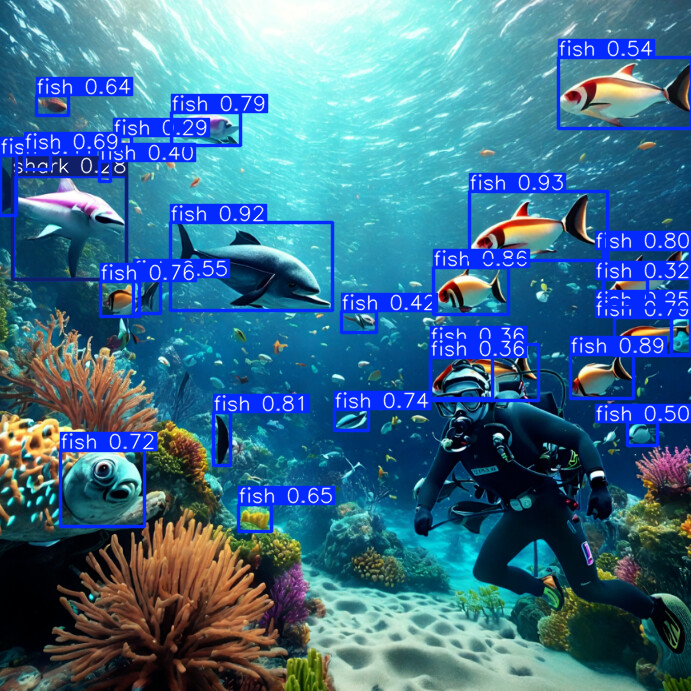

In [ ]:
# Load a test image and make predictions
results = model('/content/a-realistic-underwater-scene-template-design-35f80d8d57528fdbcee0037f8a29657c_screen.jpg')

results[0].show()


In [ ]:
import os

new_directory_path = '/content/dataset/images/test'

# Create the directory
os.makedirs(new_directory_path, exist_ok=True)
print(f"Directory created at: {new_directory_path}")


Directory created at: /content/dataset/images/test


In [ ]:
import shutil
import glob

In [ ]:
# Define the source directory where the images are currently located
source_directory = '/content/dataset/aquarium_pretrain/test/images'

# Get a list of up to 30 image files from the source directory (adjust file types if needed)
image_files = glob.glob(f"{source_directory}/*.[jpJP][pnPN][gG]")[:30]

# Check how many images were found
print(f"Found {len(image_files)} images to copy/move.")


Found 30 images to copy/move.


In [ ]:
for image_file in image_files:
    shutil.move(image_file, new_directory_path)

print(f"Moved {len(image_files)} images to {new_directory_path}")

Moved 30 images to /content/dataset/images/test


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')


image 1/1 /content/dataset/images/test/IMG_2651_jpeg_jpg.rf.84b3930aa80b610cc97bf1c176763940.jpg: 640x480 1 stingray, 38.0ms
Speed: 3.8ms preprocess, 38.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/dataset/images/test/IMG_8420_jpg.rf.31f1d5f1440e48ccf1dee988b565911b.jpg: 480x640 20 fishs, 1 shark, 6.8ms
Speed: 2.1ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/images/test/IMG_2547_jpeg_jpg.rf.9406b6f1a9fad2292c4abd28f712baaf.jpg: 640x480 5 starfishs, 7.1ms
Speed: 2.1ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/dataset/images/test/IMG_2473_jpeg_jpg.rf.6284677f9c781b0cfeec54981a17d573.jpg: 640x480 4 jellyfishs, 6.8ms
Speed: 2.6ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/dataset/images/test/IMG_2588_jpeg_jpg.rf.cb9cea8f05891cfd55a3e93f2908201f.jpg: 640x480 3 

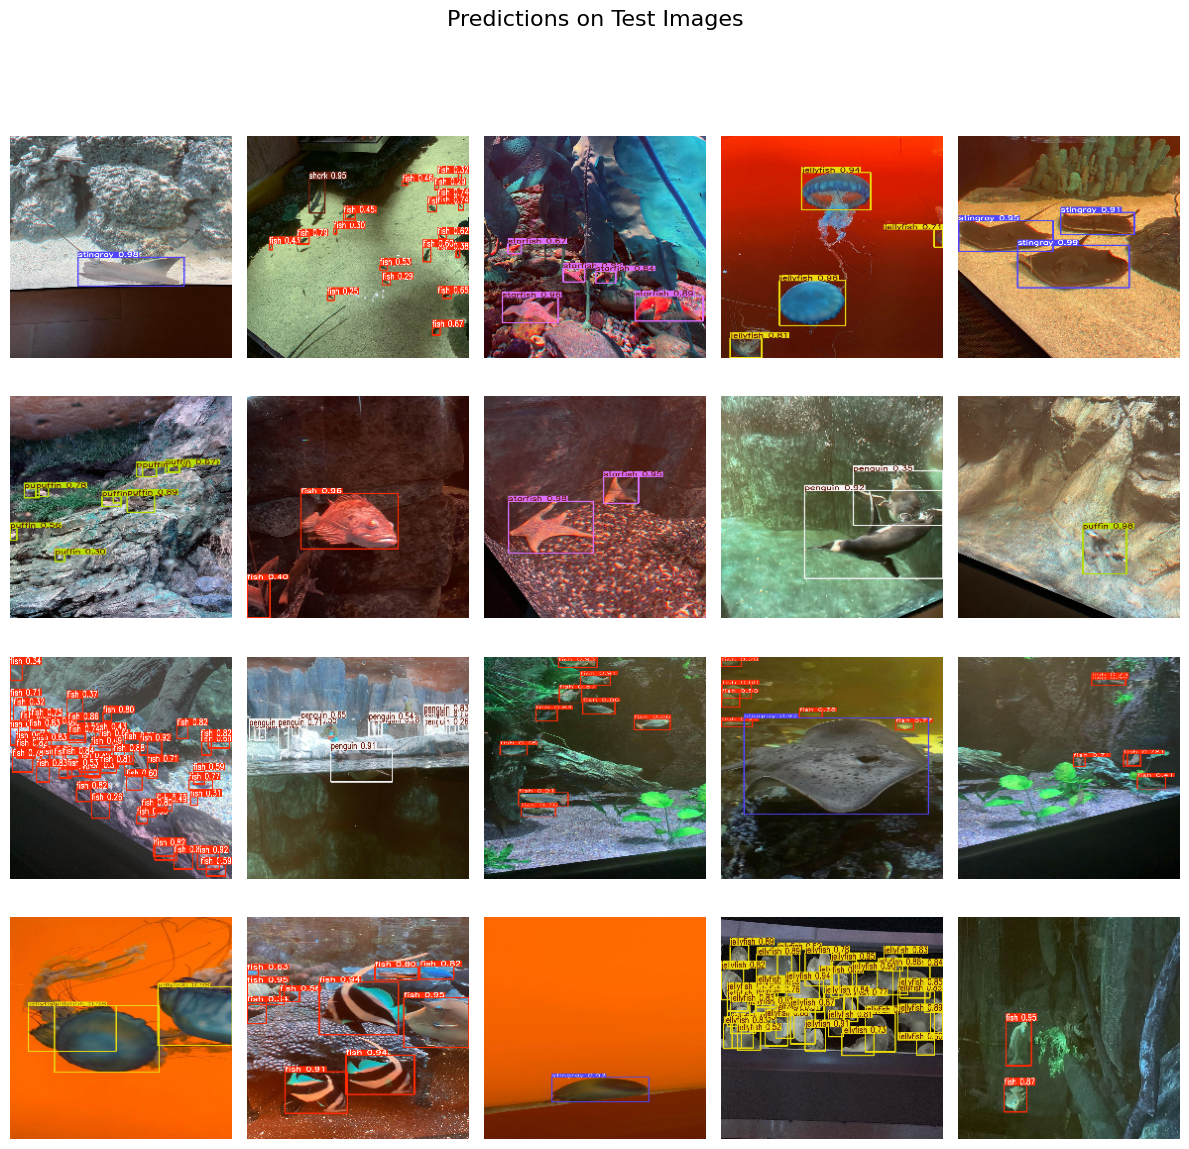

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Path to test images
test_images = glob.glob('/content/dataset/images/test/*.jpg')[:30]  # Limit to 30 images

# Run predictions on test images and store the results
results = [model(image) for image in test_images]

# Set up grid dimensions
num_images = 30
grid_size = (4, 5)
image_size = (224, 224)

# Initialize the figure with specified grid size
fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 12))
fig.suptitle("Predictions on Test Images", fontsize=16)

# Iterate over each subplot and display the corresponding image with predictions
for i, ax in enumerate(axs.flat):
    if i < num_images:
        # Get prediction result for the ith image
        result = results[i][0]

        # Plot with bounding boxes and labels
        annotated_img = result.plot()  # Plot bounding boxes on the image

        # Resize the image to the desired size
        resized_img = cv2.resize(annotated_img, image_size)

        # Show the image in the grid
        ax.imshow(resized_img)
        ax.axis('off')  # Turn off axis for a cleaner look
    else:
        ax.axis('off')  # Hide extra subplots if less than grid size

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Add space for title
plt.show()


In [ ]:

# Q1 :> Are you adding any augmentations to the dataset?
# Yes, I am using the YOLOv8 with inbuilt augmentations of random flips, color, scaling, that do improve the generalization ability of the model, especially in a real scenario underwater.
# Lighting and orientation of the objects change quite considerably underwater.

# Q2 :> How many epochs are you using for this dataset training?
#Epochs count = 10 : The epochs count appears to be a rather low count, and this is going to help in fast validation such that the model has been properly set up and will also keep the training time in check.

# Q3 :> List any other hyperparameters you are specifying while training and provide reasoning.
#  imgsz=640: I set the input image size to 640 for an efficient balance between accuracy and computation.
#  batch=16: A moderate batch size chosen to effectively use Colab's GPU memory without running out of memory.
#  patience=5: Early stopping if the model’s performance plateaus, helping to save training time.

# model.train(data='/content/underwater.yaml', epochs=10, imgsz=640, batch=16, patience=5)


# Q4 :> What output metrics are you analysing. Share concrete results from those.
#I am aiming at the mAP@0.5 (mean Average Precision with an IoU threshold of 0.5) and mAP@0.5:0.95 (averaging IoU from 0.5 to 0.95).
#The metric mAP@0.5 will serve as a good general indicator of how the model performs at common IoU threshold, while the mAP@0.5:0.95 will be a stricter testing by averaging the values of IoU.

In [ ]:
# Print metrics for analysis
results = model.val()
# Access metrics directly from the results dictionary
metrics = results.results_dict

print(f"Available keys in metrics: {metrics.keys()}")

print(metrics)

print(f"mAP50: {metrics.get('metrics/mAP50' )}")
print(f"mAP50-95: {metrics.get('metrics/mAP50-95')}")
print(f"precision: {metrics.get('metrics/precision')}")
print(f"recall: {metrics.get('metrics/recall')}")


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/aquarium_pretrain/test/labels... 608 images, 31 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<00:00, 1769.30it/s]

val: New cache created: /content/dataset/aquarium_pretrain/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:10<00:00,  3.92it/s]


                   all        638       4549      0.863      0.904      0.909      0.677
                  fish        321       2546      0.877      0.837      0.885      0.607
             jellyfish         46        625      0.854      0.962      0.889      0.662
               penguin         68        480       0.83      0.773      0.845      0.494
                puffin         63        264      0.762      0.883      0.879      0.605
                 shark        173        348      0.916      0.948      0.957      0.761
              starfish         56        109      0.889      0.963       0.96      0.817
              stingray        119        177      0.916       0.96      0.948      0.789
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
Available keys in metrics: dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])
{'metrics/precision(B)': 0.86336004